## Authr : karim abdelhalim mohammed 

## Task #4 : Exploratory Data Analysis - Terrorism ,

## As a security/defense analyst, try to find out the hot zone of terrorism. All security issues and insights derived by EDA.

### IMPORTING THE  LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the dataset

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)


##### Data Exploratory

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.shape

(181691, 135)

In [8]:
data.duplicated().sum()

0

######  Data Modifying 

In [10]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [11]:
new_data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [12]:
new_data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [13]:
new_data.columns #extracted data contains only 18 columns after optimising

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [14]:
new_data.shape

(181691, 18)

In [15]:
new_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

#### Terrorist activities in each region through area plot

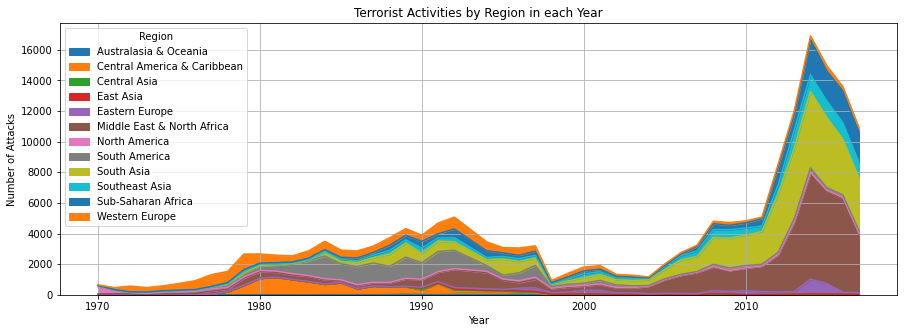

In [16]:
pd.crosstab(new_data.Year, new_data.Region).plot(kind='area',figsize=(15,5))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.show()

South Asia, Australasia and Southeast asia have large number of terrorist activities

##### Counting terrorist activities each year through countplot


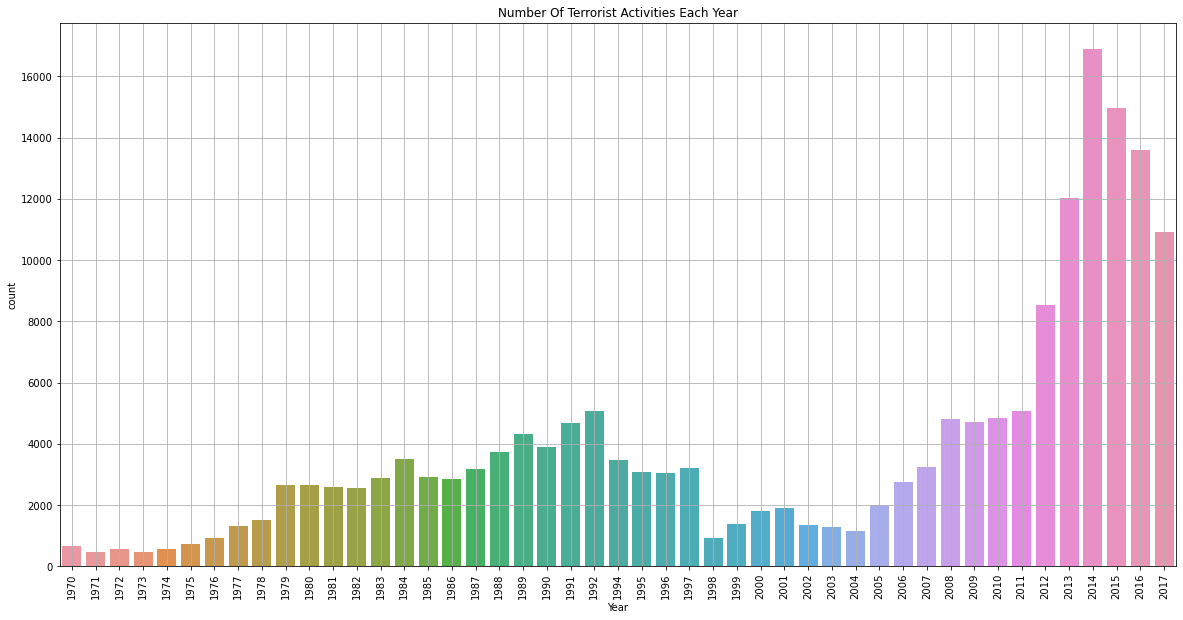

In [18]:
plt.subplots(figsize=(20, 10))
sns.countplot(x='Year',data = new_data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.grid()
plt.show()
#fgggggg


2014 and 2015 had large number of terrorist activities and its gradually increasing from 1970


### Calculating the percentage of attacks that has happened since 1970 and 2017


In [19]:
Year=new_data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 ')
print(Year[2017],'attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 
10900 attacks happened in 2017
Total number of attacks from 1970 has increased by 94.0 % till 2017


### Different types of attack

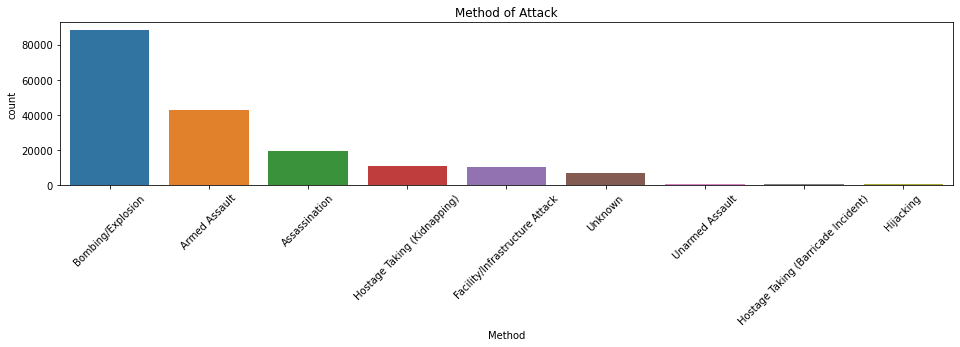

In [20]:
plt.figure(figsize=(16,3))
sns.countplot(x = new_data['AttackType'], order = new_data['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Bombing and Explosion attacks are mostly used by terrorist and hijacking is leastly used

### Different types of target

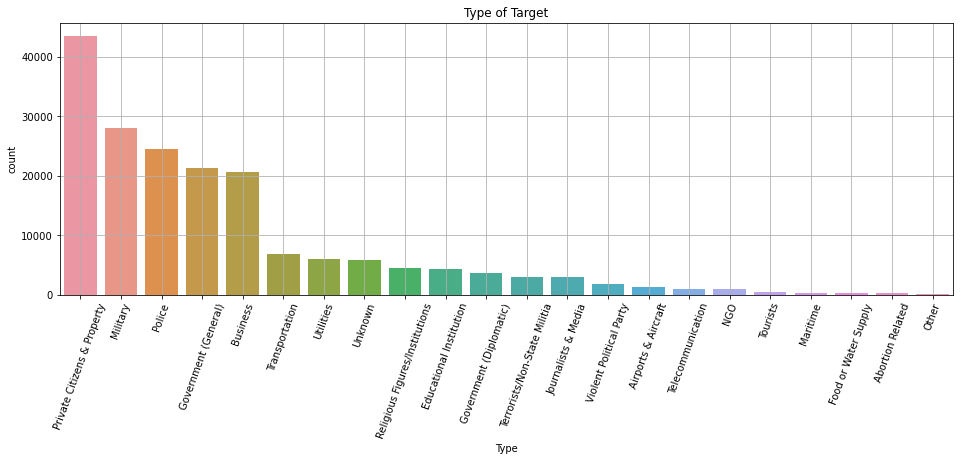

In [21]:
plt.figure(figsize=(16,5))
sns.countplot(x = new_data['Target_type'], order=new_data['Target_type'].value_counts().index)
plt.xticks(rotation=70)
plt.xlabel('Type')
plt.title('Type of Target')
plt.grid()
plt.show()

Private citizens and Property are targeted widely by terrorist when compared to other people

### Count of terrorist attacks in each country and regions

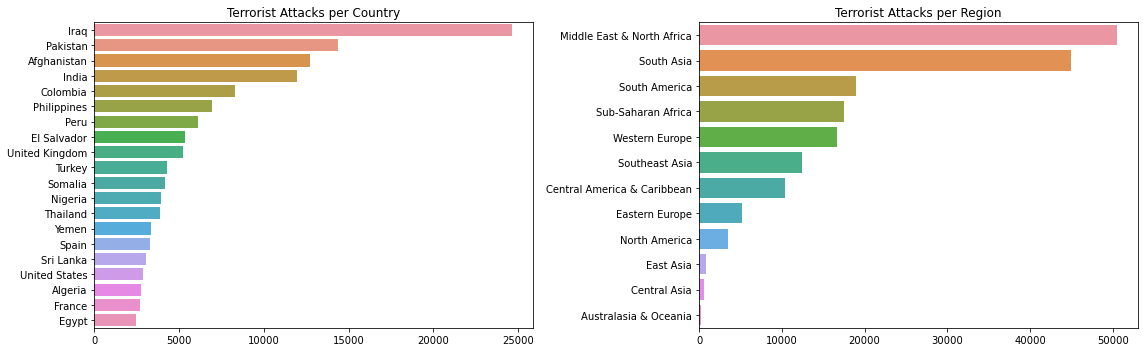

In [22]:
fig,axes = plt.subplots(figsize=(16,5),nrows=1,ncols=2)
sns.barplot(x = new_data['Country'].value_counts()[:20].values, y = new_data['Country'].value_counts()[:20].index, ax=axes[0]);
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=new_data['Region'].value_counts().values, y=new_data['Region'].value_counts().index, ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

Count of terrorist attacks is more in Iraq, Pakisthan and Afghanisthan and it is more in Middle east and north africa regions

### Country that suffered maximum and minimum attacks


In [24]:
df=new_data.groupby(['Country'],as_index=False).count()
max_count=df['Year'].max()
max_id=df['Year'].idxmax()
max_name=df['Country'][max_id]
min_count=df['Year'].min()
min_id=df['Year'].idxmin()
min_name=df['Country'][min_id]

print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


### Finding out the terrorist organizations that carried out the operations in different country

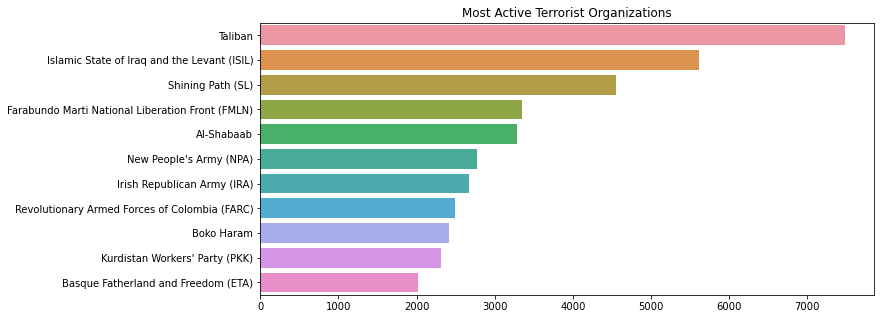

In [25]:
plt.subplots(figsize=(11,5))
sns.barplot(y=new_data['Group'].value_counts()[1:12].index,x=new_data['Group'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

Taliban and IsIamic Sate of Iraq and the levant (ISIL) are the most  active terrorist organization

###### Weapons Used By The Terrorist



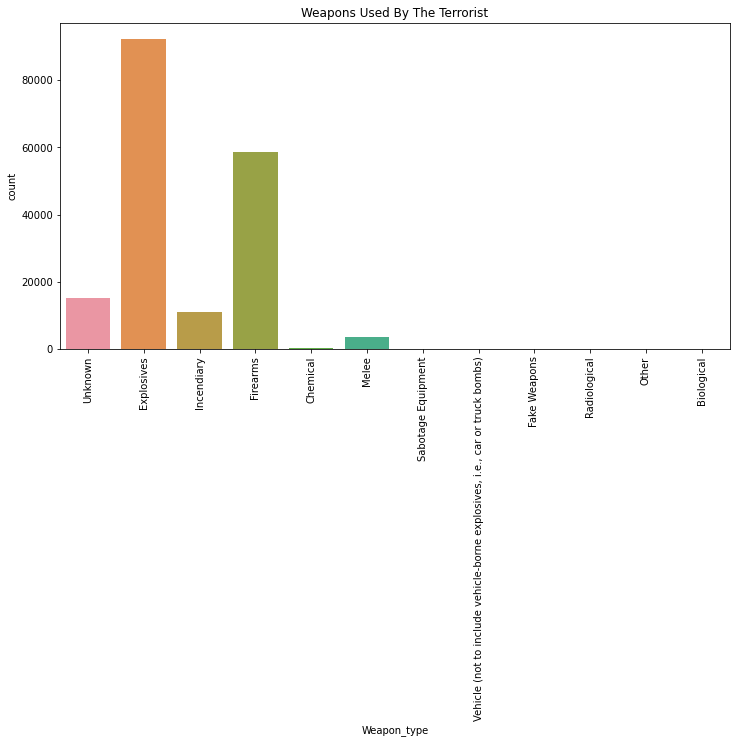

In [30]:
plt.subplots(figsize=(12, 6))
sns.countplot(x='Weapon_type', data=new_data)
plt.title('Weapons Used By The Terrorist')
plt.xticks(rotation=(90))
plt.show()

## Observations

1-Terrorist activities are more in Middle East and North Africa

2-Attacks have increased from 2010 in Middle East and South Africa

3-Terrorist Organizations have started using Airports And Aircraft and Military as their major target type since 2000's

4-Iraq has suffered the maximum number of terror attacks

5- Andorra has suffered the minimum number of terror attacks

6-Private citizens and Property are targeted widely by terrorist when compared to other people

7-Total number of attacks from 1970 has increased drastically till 2017

8-South Asia, Australasia and Southeast asia have large number of terrorist activities

9-Terrorist attacks in Middle East and North America have fatal consequences.

10- 2014 is the year that has the highest number of attacks.

11-The weapons used by the Terrorist for attack is Explosives & Firearm.